## Table of Content

1. [Importing Dataset](#chapter1) 
    1. [Basic Insight of Dataset](#section_1_1)
* [Data Wrangling](#chapter2)
    1. [Identify and Handle Missing Values](#section_2_1)
    * [Correct Data Format](#section_2_2)
    * [Data Standardization](#section_2_3)
    * [Data Normalization](#section_2_4)
    * [Binning](#section_2_5)
    * [Indicator Variable (Dummy Variable)](#section_2_6) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Show max columns and rows from display options
pd.options.display.max_columns = None # None means no max value --- show all
pd.options.display.max_rows = None

## 1.  Importing Dataset <a class="anchor" id="chapter1"></a>

In [2]:
cars = pd.read_csv('automobile.csv')
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 1.1 Basic Insight of Dataset <a class="anchor" id="section_1_1"></a>
1. Data Types
- Statistical Summary

In [3]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## 2. Data Wrangling <a class="anchor" id="chapter2"></a>
1. Identify and handle missing values
- Correct data format
- Data standardization
- Data Normalization (centering/scaling)
- Binning
- Indicator variable

### 2.1 Identify and handle missing values <a class="anchor" id="section_2_1"></a>

In [6]:
# Show unique values in each column 
for col in cars.columns.unique().tolist():
    print(col)
    print(cars[col].unique())
    print('---------------------------------------------------------------')

symboling
[ 3  1  2  0 -1 -2]
---------------------------------------------------------------
normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
---------------------------------------------------------------
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
---------------------------------------------------------------
fuel-type
['gas' 'diesel']
---------------------------------------------------------------
aspiration
['std' 'turbo']
---------------------------------------------------------------
num-of-doors
['two' 'four' '?']
---------------------

In [7]:
# Replace '?' to 'NaN'
cars.replace('?', np.nan, inplace=True)

In [8]:
# Count missing values in each column 
for col in cars.isnull().columns.values.tolist():
    print(col)
    print(cars.isnull()[col].value_counts())
    print('---------------------------------------------------------------')

symboling
False    205
Name: symboling, dtype: int64
---------------------------------------------------------------
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
---------------------------------------------------------------
make
False    205
Name: make, dtype: int64
---------------------------------------------------------------
fuel-type
False    205
Name: fuel-type, dtype: int64
---------------------------------------------------------------
aspiration
False    205
Name: aspiration, dtype: int64
---------------------------------------------------------------
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
---------------------------------------------------------------
body-style
False    205
Name: body-style, dtype: int64
---------------------------------------------------------------
drive-wheels
False    205
Name: drive-wheels, dtype: int64
---------------------------------------------------------------
engine-location


Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

1. "normalized-losses": 41 missing data
- "num-of-doors": 2 missing data
- "bore": 4 missing data
- "stroke" : 4 missing data
- "horsepower": 2 missing data
- "peak-rpm": 2 missing data
- "price": 4 missing data

#### Dealing with missing data
1. drop data
  1. drop the whole row
  2. drop the whole column
2. replace data
  1. replace it by mean
  2. replace it by frequency
  3. replace it based on other functions

- Drop the whole row:
  - "price": 4 missing data, simply delete the whole row
    - Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us
- Replace by mean:
    - "normalized-losses": 41 missing data, replace them with mean
    - "stroke": 4 missing data, replace them with mean
    - "bore": 4 missing data, replace them with mean
    - "horsepower": 2 missing data, replace them with mean
    - "peak-rpm": 2 missing data, replace them with mean
- Replace by frequency:
    - "num-of-doors": 2 missing data, replace them with "four".
        - Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

In [9]:
#drop whole row with NaN in "price" column because price is what we want to predict
cars.dropna(subset=['price'], axis=0, inplace=True)
cars.reset_index(drop=True, inplace=True)

In [10]:
# Get index of columns which has missing data to replace by mean
mean_col_idx = []
for col in ["normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"]:
    mean_col_idx.append(cars.columns.get_loc(col))
mean_col_idx    

[1, 19, 18, 21, 22]

In [11]:
# Replace by mean
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(cars.iloc[:, mean_col_idx])
cars.iloc[:, mean_col_idx] = si.transform(cars.iloc[:, mean_col_idx])

In [12]:
# Replace by the most frequent 

from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si.fit(cars.loc[:, ["num-of-doors"]])
cars.loc[:, ["num-of-doors"]] = si.transform(cars.loc[:, ["num-of-doors"]])

### 2.2 Correct data format <a class="anchor" id="section_2_2"></a>

In [13]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [14]:
# Convert data types to proper format
cars[["bore", "stroke"]] = cars[["bore", "stroke"]].astype("float")
cars[["normalized-losses"]] = cars[["normalized-losses"]].astype("int")
cars[["price"]] = cars[["price"]].astype("float")
cars[["peak-rpm"]] = cars[["peak-rpm"]].astype("float")

### 2.3 Data Standardization <a class="anchor" id="section_2_3"></a>

In [15]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
cars['city-L/100km'] = 235/cars["city-mpg"]

# Change the name of column to "highway-L/100km"
cars["highway-mpg"] = 235/cars["highway-mpg"]
cars.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


### 2.4 Data Normalization (centering/scaling) <a class="anchor" id="section_2_4"></a>

In [16]:
# replace (original value) by (original value)/(maximum value)
cars['length'] = cars['length']/cars['length'].max()
cars['width'] = cars['width']/cars['width'].max()
cars['height'] = cars['height']/cars['height'].max() 

### 2.5 Binning <a class="anchor" id="section_2_5"></a>

In [17]:
# Convert data to correct format
cars["horsepower"]=cars["horsepower"].astype(int, copy=True)

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

Text(0.5, 1.0, 'horsepower bins')

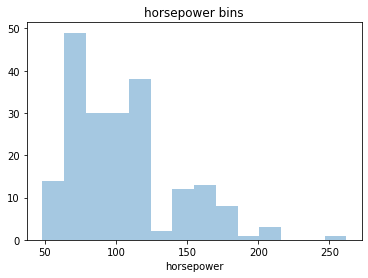

In [18]:
# Plot the histogram of horspower, to see what the distribution of horsepower looks like.
sns.distplot(a=cars["horsepower"], kde=False)
plt.title("horsepower bins")

In [19]:
bins = np.linspace(min(cars["horsepower"]), max(cars["horsepower"]), 4)

cars['horsepower-binned'] = pd.cut(cars['horsepower'], bins, labels=['Low', 'Medium', 'High'], include_lowest=True )
cars[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [20]:
cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

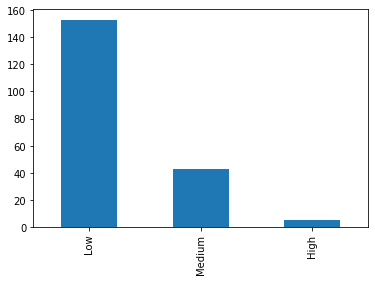

In [21]:
# plot the distribution of each bin
cars["horsepower-binned"].value_counts().plot(kind='bar')

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <a list of 3 Patch objects>)

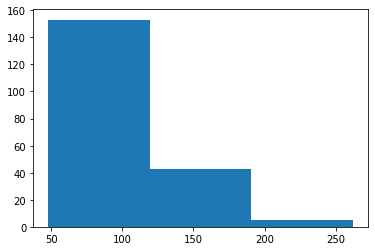

In [22]:
plt.hist(cars["horsepower"], bins = 3)

Text(0.5, 1.0, 'horsepower bins')

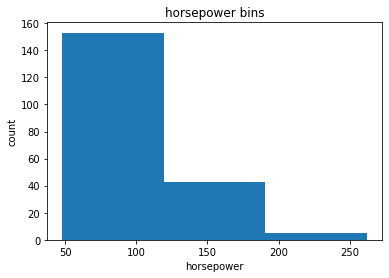

In [23]:
plt.hist(cars["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### 2.6 Indicator variable (or dummy variable) <a class="anchor" id="section_2_6"></a>
Two categorical ordinal variables:
- 'fuel-type'		
- 'aspiration'

In [24]:
# get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(cars["fuel-type"])

# change column names for clarity
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

# merge data frame "cars" and "dummy_variable_1" 
cars = pd.concat([cars, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "cars"
cars.drop("fuel-type", axis = 1, inplace=True)

In [25]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(cars['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#merge the new dataframe to the original datafram
cars = pd.concat([cars, dummy_variable_2], axis=1)
# drop original column "aspiration" from "cars"
cars.drop('aspiration', axis = 1, inplace=True)

In [26]:
cars.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [27]:
cars.to_csv('clean_automobile.csv', index=False)